In [2]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.datasets import load_linnerud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d.axes3d import Axes3D
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

%matplotlib inline

In [3]:
boston_dataset=load_boston()
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [4]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
data=pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)

In [6]:
data["Price"]=pd.DataFrame(data=boston_dataset.target)

In [7]:
data.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


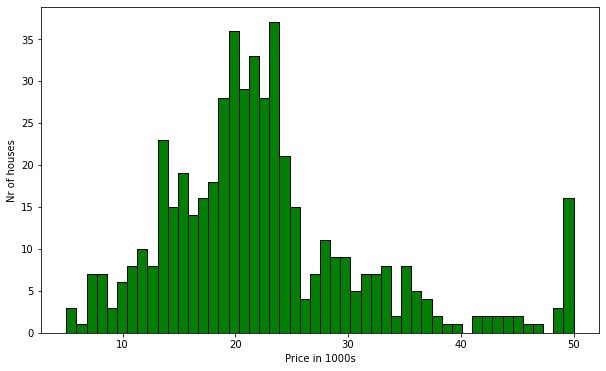

In [9]:
plt.figure(figsize=(10,6))
plt.hist(data["Price"],bins=50,ec="black",color="green")
plt.xlabel("Price in 1000s")
plt.ylabel("Nr of houses")
plt.show()

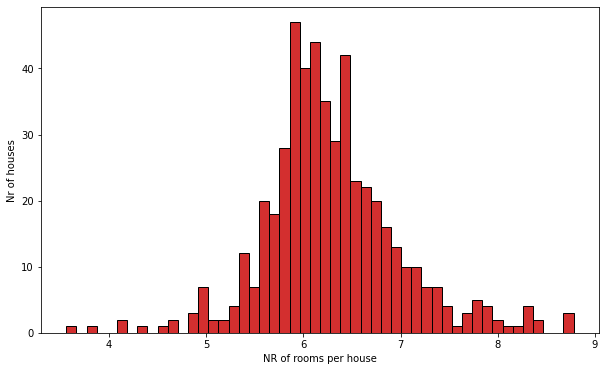

In [10]:
plt.figure(figsize=(10,6))
plt.hist(data["RM"],bins=50,ec="black",color="#D32F2F")
plt.xlabel("NR of rooms per house")
plt.ylabel("Nr of houses")
plt.show()

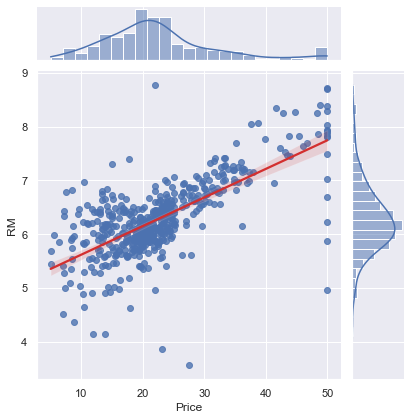

In [11]:
sns.set_theme(style="darkgrid")
sns.jointplot(x=data["Price"],y=data["RM"],kind="reg", joint_kws={"line_kws":{'color':'#D32F2F'}})
plt.show()

In [12]:
np.mean(data['RM'])

6.284634387351787

In [13]:
def avg(x):
    return sum(x)/len(x)

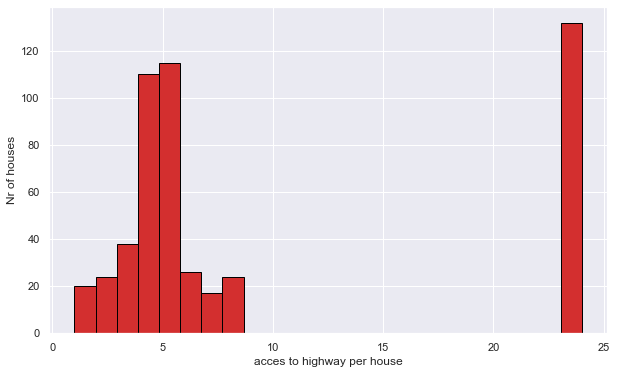

In [14]:
plt.figure(figsize=(10,6))
plt.hist(data["RAD"],bins=24,ec="black",color="#D32F2F")
plt.xlabel("acces to highway per house")
plt.ylabel("Nr of houses")
plt.show()

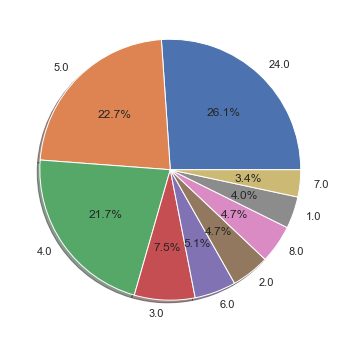

In [15]:
frequency=data["RAD"].value_counts()
plt.figure(figsize=(10,6))
plt.pie(frequency,labels=frequency.index,shadow=True,autopct='%1.1f%%')
plt.show()

# Correlation
# $$ \rho_{xy}=corr(x,y)$$
# $$ -1.0 \leq \rho_{xy} \leq +1.0$$

In [16]:
mask=np.zeros_like(data.corr())
triangle_indices=np.triu_indices_from(mask)
mask[triangle_indices]=True

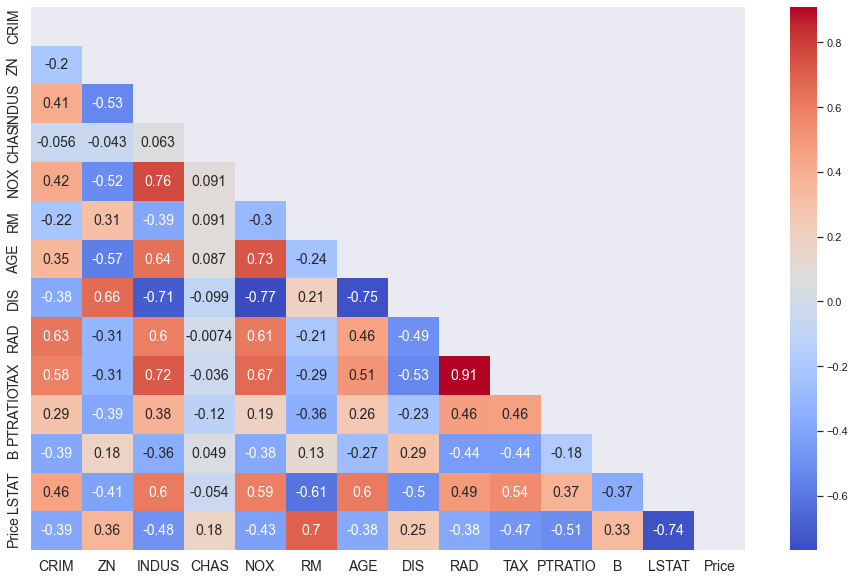

In [17]:
plt.figure(figsize=[16,10])
sns.heatmap(data.corr(),mask=mask,annot=True,cmap=cm.coolwarm,annot_kws={"size":14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

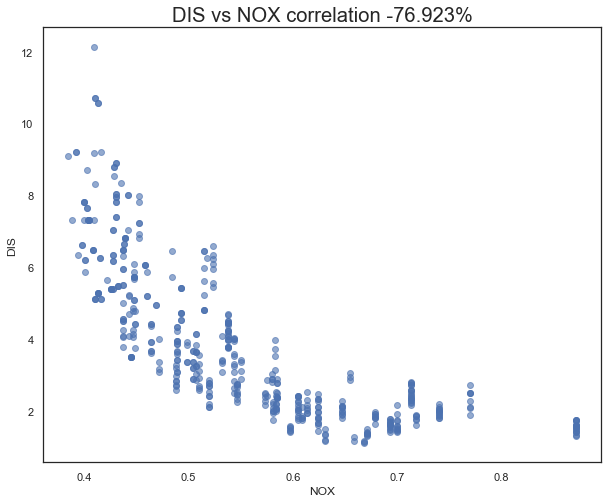

In [18]:
#correlation between the NOX and DIS features 
nox_dis_corr=data['NOX'].corr(data['DIS'])
plt.figure(figsize=(10,8))
plt.scatter(x=data['NOX'],y=data['DIS'],alpha=0.6)
plt.xlabel('NOX')
plt.ylabel('DIS')
plt.style.use('fivethirtyeight')
plt.title(f'DIS vs NOX correlation {round(nox_dis_corr*100,3)}%')
plt.show()

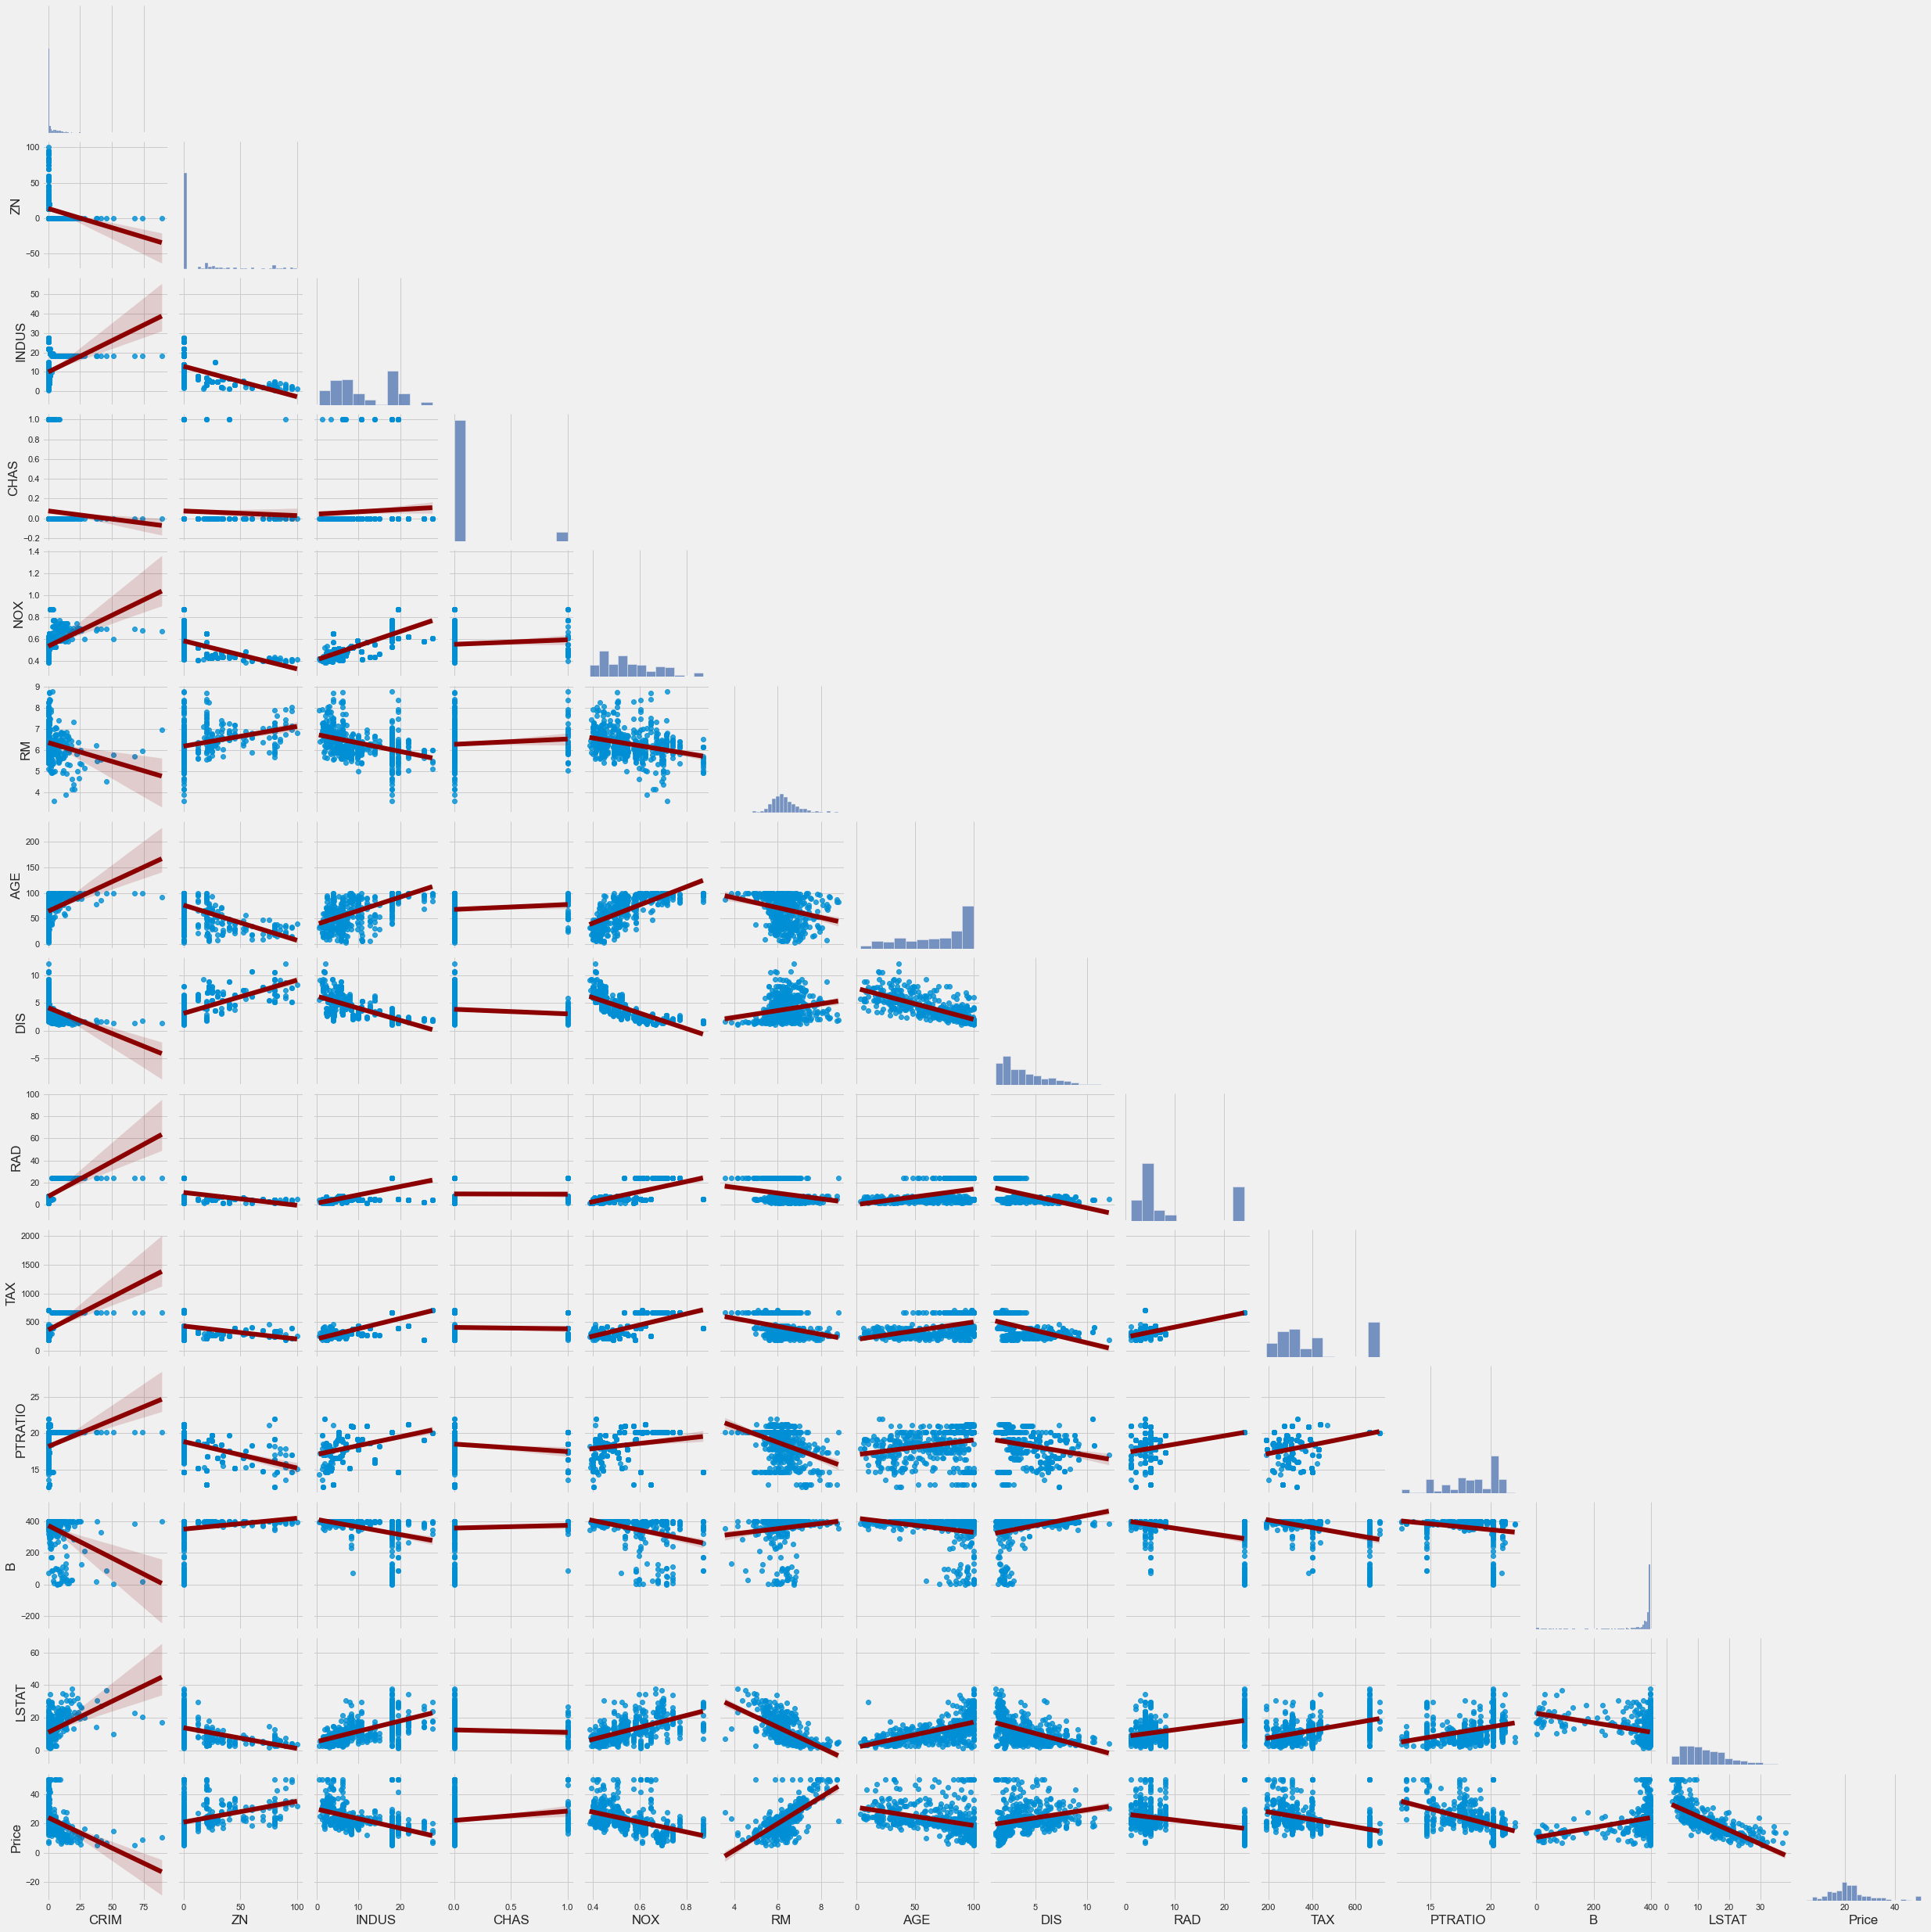

Wall time: 1min 11s


In [19]:
%%time
sns.pairplot(data,kind='reg',corner=True,plot_kws={'line_kws':{'color':'darkred'}})
plt.show()

# Training & Test Dataset and Split

In [31]:
print(x_train.shape)
print(y_train.shape)

(404, 13)
(404,)


In [21]:
prices=data['Price']
features=data.drop('Price', axis=1)
x_train, x_test, y_train, y_test = train_test_split(features,prices,test_size=0.2,random_state=10)
reger=LinearRegression()
results=reger.fit(x_train,y_train)
pd.DataFrame(data=results.coef_,index=x_train.columns,columns=['coef'])

,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


In [20]:
print(f'Training R-sqaure: {results.score(x_train,y_train)}')
print(f'Test R-sqaure: {results.score(x_test,y_test)}')

Training R-sqaure: 0.750121534530608
Test R-sqaure: 0.6709339839115628


# Data transformation

In [21]:
data['Price'].skew()

1.1080984082549072

In [22]:
newData=np.log(data['Price'])
newData.skew()

-0.33032129530987864

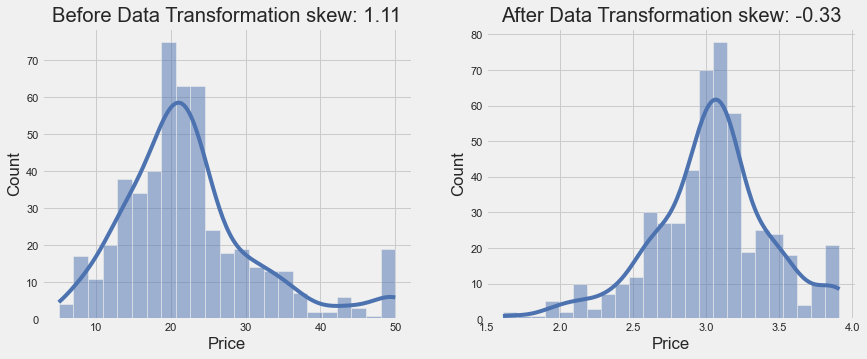

In [23]:
plt.figure(figsize=(13,5))
#Befor applying data transformation
plt.subplot(1,2,1)
sns.histplot(data['Price'],kde=True)
plt.title(f'Before Data Transformation skew: {round(data.Price.skew(),2)}')
#after applying data transformation (log)
plt.subplot(1,2,2)
sns.histplot(newData,kde=True)
plt.title(f'After Data Transformation skew: {round(newData.skew(),2)}')

plt.show()

# Analysing coefficient p-value & statsmodels

In [55]:
x_incl_const=sm.add_constant(x_train)
model= sm.OLS(y_train,x_incl_const)
results_ols=model.fit()
pd.DataFrame({'coef':results_ols.params,'p-value':round(results_ols.pvalues,3)})

,coef,p-value
const,4.035922,0.000
CRIM,-0.010702,0.000
ZN,0.001461,0.014
CHAS,0.086449,0.025
NOX,-0.616448,0.000
RM,0.076133,0.000
DIS,-0.052692,0.000
RAD,0.013743,0.000
TAX,-0.000590,0.000
PTRATIO,-0.033481,0.000


# Model Simplification and the BIC

In [34]:
x_incl_const=sm.add_constant(x_train)
model= sm.OLS(y_train,x_incl_const)
results_ols=model.fit()
pd.DataFrame({'coef':results_ols.params,'p-value':round(results_ols.pvalues,3)})
#mse 
full_mse=results_ols.mse_resid
#R² 
full_rsquare=results_ols.rsquared
print(x_incl_const.shape)
print(y_train.shape)

(404, 14)
(404,)


C:\Users\Re\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [30]:
print(results_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     90.06
Date:                Sun, 03 Jul 2022   Prob (F-statistic):          1.12e-108
Time:                        22:15:37   Log-Likelihood:                -1170.5
No. Observations:                 404   AIC:                             2369.
Df Residuals:                     390   BIC:                             2425.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.5331      5.428      6.730      0.0

In [61]:
#execluding the indus from the featurs 2419 2414 0.750 0.749 0.746
x_incl_const=sm.add_constant(x_train)
model= sm.OLS(y_train,x_incl_const)
results_ols=model.fit()
pd.DataFrame({'coef':results_ols.params,'p-value':round(results_ols.pvalues,3)})
#mse 
omitted_var_mse=results_ols.mse_resid
#R² 
omitted_var_rsquare=results_ols.rsquared

In [62]:
print(results_ols.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     135.6
Date:                Sat, 02 Jul 2022   Prob (F-statistic):          3.68e-126
Time:                        23:23:20   Log-Likelihood:                 110.76
No. Observations:                 404   AIC:                            -197.5
Df Residuals:                     392   BIC:                            -149.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0359      0.226     17.819      0.0

# Residuals & Residual plots


In [76]:
#Modified model: transformed (using log prices) & simplified (droping two features)
prices=np.log(data['Price'])
features=data.drop(['Price','INDUS','AGE'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(features,prices,test_size=0.2,random_state=10)
#Using stats model
X_con=sm.add_constant(x_train)
models=sm.OLS(y_train,X_con).fit()
#Residuals
models.resid
#mse logged
reduced_logged_mse=models.mse_resid
#R² logged
reduced_r_square=models.rsquared

C:\Users\Re\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


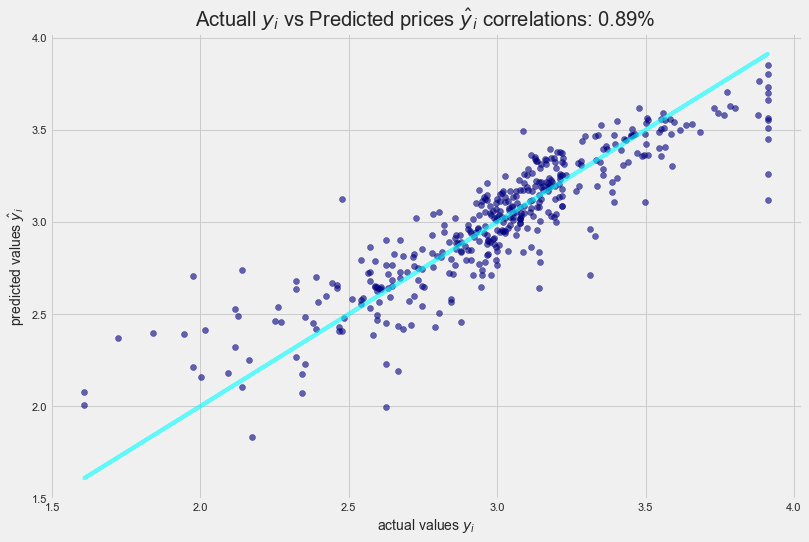

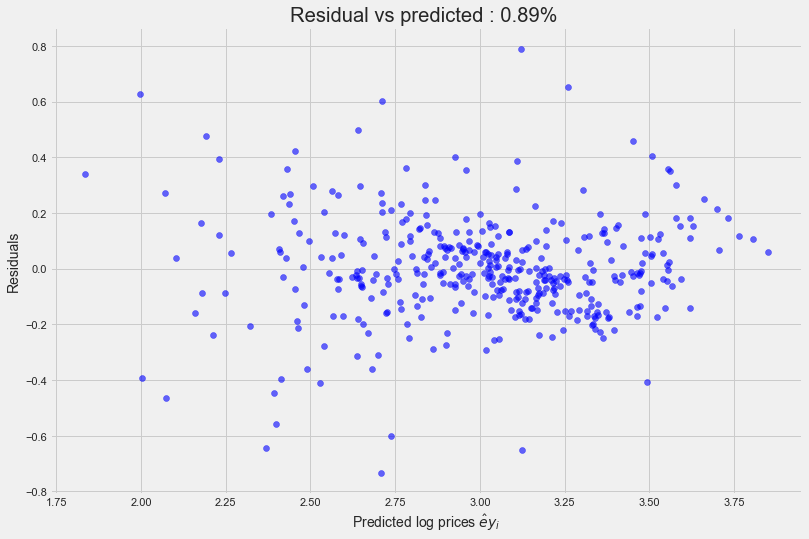

In [77]:
corr=round(y_train.corr(models.fittedvalues),2)
#logged prices
plt.figure(figsize=(12,8))
plt.scatter(x=y_train,y=models.fittedvalues,c='navy',alpha=0.6)
plt.plot(y_train,y_train,color='cyan',alpha=0.6)
plt.xlabel("actual values $y _i$", fontsize=14)
plt.ylabel("predicted values $\haty _i$",fontsize=14)
plt.title(f'Actuall $y _i$ vs Predicted prices $\haty _i$ correlations: {round(y_train.corr(models.fittedvalues),2)}% ')
plt.show()
#predicted loged prices vs residual
plt.figure(figsize=(12,8))
plt.scatter(x=models.fittedvalues,y=models.resid,c='blue',alpha=0.6)
plt.xlabel("Predicted log prices $\hate y _i$", fontsize=14)
plt.ylabel("Residuals",fontsize=14)
plt.title(f'Residual vs predicted : {round(y_train.corr(models.fittedvalues),2)}% ')
plt.show()

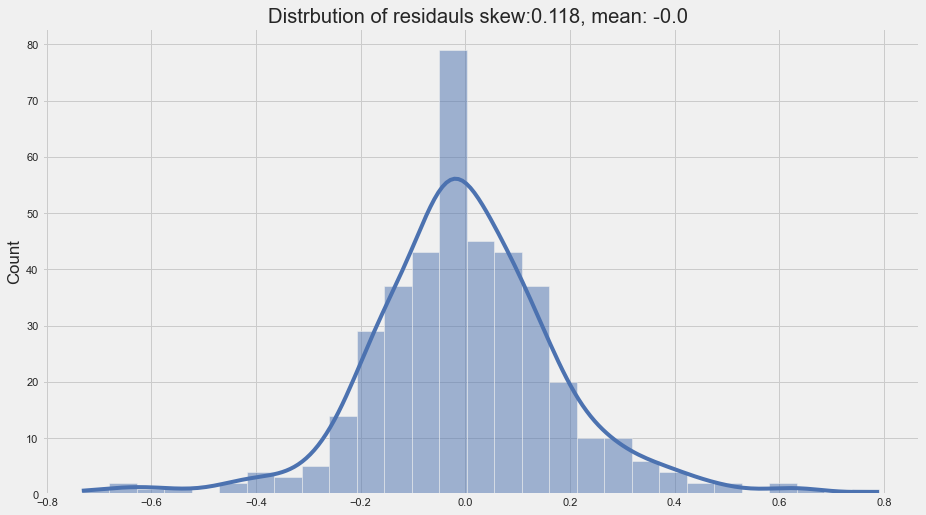

In [78]:
#Distrbution of residuals checking for normality
plt.figure(figsize=(14,8))
sns.histplot(models.resid,kde=True)
plt.title(f'Distrbution of residauls skew:{models.resid.skew().round(3)}, mean: {round(models.resid.mean(),3)} ')
plt.show()

In [79]:
resi=np.e**models.resid
pd.DataFrame(resi.describe().round(3),columns=['Results'])

,Results
count,404.000
mean,1.017
std,0.196
min,0.480
25%,0.906
50%,0.985
75%,1.104
max,2.205


In [80]:
resi.skew()

1.4325080493302107

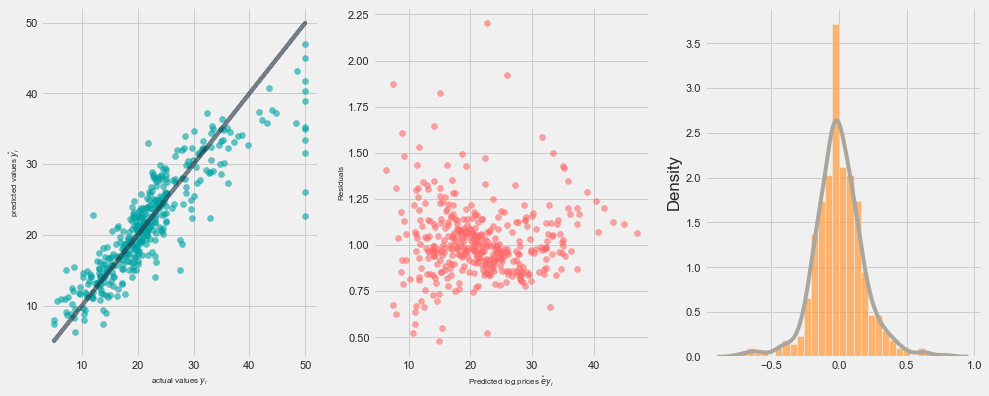

In [81]:
corr=round(y_train.corr(models.fittedvalues),2)
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
#logged prices
plt.scatter(x=np.e**y_train,y=np.e**models.fittedvalues,c='#01a3a4',alpha=0.6)
plt.plot(np.e**y_train,np.e**y_train,color='#222f3e',alpha=0.6)
plt.xlabel("actual values $y _i$", fontsize=8)
plt.ylabel("predicted values $\haty _i$",fontsize=8)
#predicted loged prices vs residual
plt.subplot(1,3,2)
plt.scatter(x=np.e**models.fittedvalues,y=np.e**models.resid,c='#ff6b6b',alpha=0.6)
plt.xlabel("Predicted log prices $\hate y _i$", fontsize=8)
plt.ylabel("Residuals",fontsize=8)
plt.subplot(1,3,3)
sns.histplot(models.resid,color='#ff9f43',stat='density')
sns.kdeplot(models.resid, color='#aaa69d')
plt.show()

In [82]:
pd.DataFrame({'R-squared':[full_rsquare,omitted_var_rsquare,reduced_r_square],'Mse':[full_mse,omitted_var_mse,reduced_logged_mse]},
             index=['full model','omitted variable','reduced model']).round(3)

,R-squared,Mse
full model,0.792,0.035
omitted variable,0.792,0.035
reduced model,0.792,0.035


In [105]:
upperbound=np.log(30)+2*np.sqrt(reduced_logged_mse)
lowerbound=np.log(30)-2*np.sqrt(reduced_logged_mse)
print(f'{upperbound} \n{lowerbound}')

3.774685645593144 
3.027709117731167
